In [ ]:
from qa_qc_lib.qa_qc_kern import QA_QC_kern
import numpy as np
import pandas as pd
import time

Тест предназначен для оценки дисперсии входных данных.
Он проводится по следующему алгоритму: изначально,
используя статистические методы, детектируются и удаляются
выбросные точки, затем полученное облако точек  аппроксимируется
и считается коэффициент детерминации R2. Если его значение больше
0.7, то тест считается пройденным. Если значение меньше 0.7, то
точки сортируются по удаленности от линии тренда, и запускается
цикл, за одну итерацию которого удаляется самая отдаленная от
линии аппроксимации точка, и считается R2, если значение больше
0.7, и удалено менее 10% точек, то тест пройден, иначе - нет.

Args:
    x (array[int/float]): массив с данными для проверки
    y (array[int/float]): массив с данными для проверки

Returns:
    dict[str, bool | str | Any] | dict[str, bool | str | Any]: словарь с результатом теста, значением
                                                              Коэффициента r2, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/DispersionFail(L-H).xlsx")
df=df[["Depth, m","Porosity"]].dropna()
x=df["Depth, m"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(file_path=path)
tests.test_general_dependency_checking(x,y)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/DispersionOK(L-H).xlsx")
df=df[["Density, g/cc","Porosity"]].dropna()
x=df["Density, g/cc"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(file_path=path)
tests.test_general_dependency_checking(x,y)
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия типовой
для данного кроссплота и полученной аппроксимации.
В данном случае зависимость линейная по функции
y=a*x+b, при этом a<0

Args:
    self.sw_residual (array[int/float]): массив с данными коэффициент остаточной водонасыщенности для проверки
    self.kp (array[int/float]): массив с данными Открытая пористость по жидкости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/Swc-PoroFail(N-H).xlsx")
df=df[["Sw","Porosity"]].dropna()
x=df["Sw"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=x,porosity_open=y,file_path=path)
tests.start_tests(["test_quo_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/Swc-PoroOK(N-H).xlsx")
df=df[["Sw","Porosity"]]
y=df["Sw"].to_numpy()
x=df["Porosity"].to_numpy()
z=df["Porosity"].to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=y, poroHe=x,porosity_kerosine=z,file_path=path)
tests.start_tests(["test_quo_kp_dependence"])
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
x=np.array([1,2,3,4,5,6,np.nan,7,50])
y=np.array([50,10,9,8,7,6,8,5,4])
path="report\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,file_path=path)
tests.start_tests(["test_quo_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия типовой
для данного кроссплота и полученной аппроксимации.
В данном случае зависимость линейная по функции y=a*x+b, при этом a<0

Args:
    self.kp (array[int/float]): массив с данными коэффициента пористости для проверки
    self.density (array[int/float]): массив с данными плотности для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

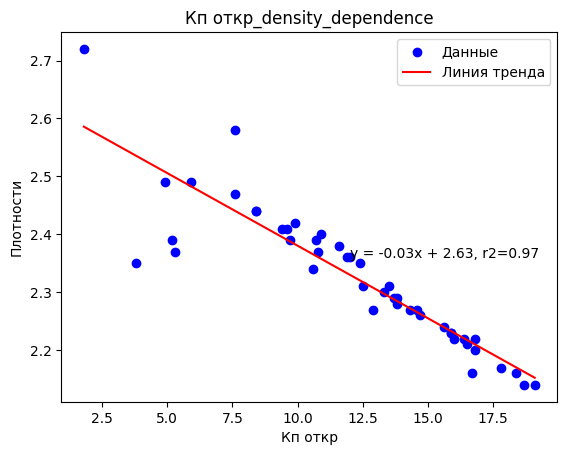

     Тест пройден успешно.
     Зависимость выполняется. Выпадающие точки ([], [])
--- 0.6196646690368652 seconds ---


In [4]:
start_time = time.time()
df=pd.read_excel("data/Density-PoroOK(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]].dropna()
x=df["Density, g/cc"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(density=x, porosity_open=y,file_path=path)
tests.start_tests(["test_kp_density_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/Density-PoroFail(J-H).xlsx")
df=df[["Density, g/cc","Porosity"]].dropna()
x=df["Density, g/cc"].dropna().to_numpy()
y=df["Porosity"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(density=x, porosity_open=y,file_path=path)
tests.start_tests(["test_kp_density_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

 Тест предназначен для оценки соответствия типовой
 для данного кроссплота и полученной аппроксимации.
 В данном случае зависимость линейная по функции y=a*x+b, при этом a<0

 Args:
     self.sw_residual (array[int/float]): массив с данными коэффициент остаточной водонасыщенности для проверки
     self.kp_din (array[int/float]): массив с данными коэффициент динамической пористости для проверки

 Returns:
     image: визуализация кроссплота
     dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
     file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel("data/file.xlsx")
x=np.array([0.8,0.7,0.6,0.5,0.4,0.3,0.2])
y=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
z=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
path="report\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,kno=z,file_path=path)
tests.start_tests(["test_sw_residual_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel("report/file.xlsx")
x=np.array([1,442,384,4,5,-6,7,-50])
y=np.array([122,-2,-322,-4,5,6,722,50])
z=np.array([1,-2,3,488,52,6,7,50])
path="report\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,kno=z,file_path=path)
tests.start_tests(["test_sw_residual_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки физичности
взаимосвязи двух кроссплотов - Обплнас-Кп и
Минпл-Кп. Пусть первый аппроксимируется
линией тренда y=a1*x+b1, а второй - y=a2*x+b2, при этом a1<a2

Args:
    self.kp (array[int/float]): массив с данными коэффициента пористости для проверки
    self.obblnas (array[int/float]): массив с данными объемная плотность для проверки
    self.pmu (array[int/float]): массив с данными минералогическая плотность для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel("report/file.xlsx")
x=np.array([1,2,3,4,5,6,7,7])
y=np.array([1,2,3,4,5,6,7,10])
z=np.array([1,2,3,4,5,6,7,7])
path="report\\"
tests = QA_QC_kern(obplnas=x, pmu=y,porosity_open=z,file_path=path)
tests.start_tests(["test_obblnas_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel("report/file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([50,10,9,8,7,6,5,4])
z=np.array([1,2,3,4,5,6,7,50])
path="report\\"
tests = QA_QC_kern(obplnas=x, pmu=y,porosity_open=z,file_path=path)
tests.start_tests(["test_obblnas_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия
типовой для данного кроссплота и полученной
аппроксимации. В данном случае зависимость
линейная по функции y=a*x+b, при этом a>0, b>0

Args:
    self.kp_ef (array[int/float]): массив с данными коэффициент эффективной пористости для проверки
    self.kp_din (array[int/float]): массив с данными коэффициент динамической пористости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([0.8,0.7,0.6,0.5,0.4,0.3,0.2])
y=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
z=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
path="report\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,kno=z,file_path=path)
tests.start_tests(["test_kp_ef_kpdin_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,442,384,4,5,-6,7,-50])
y=np.array([122,-2,-322,-4,5,6,722,50])
z=np.array([1,-2,3,488,52,6,7,50])
path="report\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,kno=z,file_path=path)
tests.start_tests(["test_kp_ef_kpdin_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия
типовой для данного кроссплота и полученной
аппроксимации. В данном случае зависимость
линейная по функции y=a*x+b, при этом a>0, b<0

Args:
    self.kp_ef (array[int/float]): массив с данными коэффициента эффективной пористости для проверки
    self.kp (array[int/float]): массив с данными коэффициента пористости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([0.8,0.7,0.6,0.5,0.4,0.3,0.2])
y=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
z=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
path="report\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,file_path=path)
tests.start_tests(["test_kp_ef_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,22,334,5,6,722,5330])
y=np.array([222212,2333,3333,433,5333,6,3,330])
z=np.array([1,2,2,2,2,6,72,50])
path="report\\"
tests = QA_QC_kern(sw_residual=x, porosity_open=y,file_path=path)
tests.start_tests(["test_kp_ef_kp_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия
типовой для данного кроссплота и полученной
аппроксимации. В данном случае зависимость
линейная по функции y=a*x+b, при этом a>0, b<0

Args:
    self.kp (array[int/float]): массив с данными Открытая пористость по жидкости для проверки
    self.kp_din (array[int/float]): массив с данными коэффициент динамической пористости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

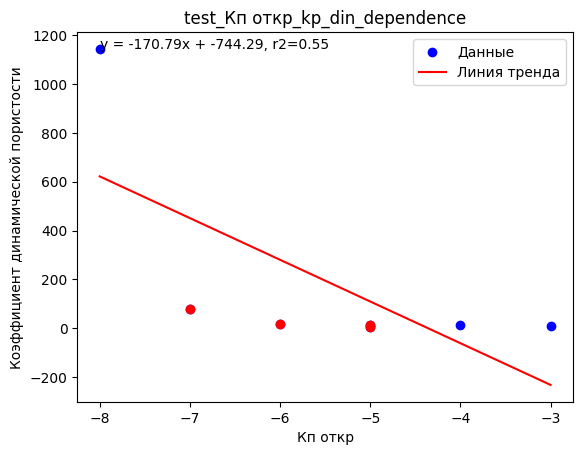

     Тест не пройден.
     Зависимость не выполняется. Выпадающие точки ([], [0, 3, 4, 5])
--- 0.18079757690429688 seconds ---


In [5]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([8,7,6,5,4,3,2])
y=np.array([-5,-3,-4,-5,-6,-7,-8])
z=np.array([1,2,2,2,2,6,72,50])
p=np.array([1,2,2,2,2,6,72,50])
path="report\\"
tests = QA_QC_kern(porosity_open=y,sw_residual=z,kno=p,file_path=path)
tests.start_tests(["test_kp_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([ 1,-6,-9,-6,-6,-6,-10,-10])
y=np.array([1,2,3,2,2,2,2,2])
z=np.array([1,2,2,2,2,2,3,3])
p=np.array([1,2,2,2,2,2,3,3])
path="report\\"
tests = QA_QC_kern(porosity_open=x,sw_residual=z,kno=p,file_path=path)
tests.start_tests(["test_kp_kp_din_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия
типовой для данного кроссплота и полученной
аппроксимации. В данном случае зависимость по
функции y=a*exp(b*x) при этом b>0

Args:
    self.kpr (array[int/float]): массив с данными коэффициент проницаемости для проверки
    self.kp (array[int/float]): массив с данными Открытая пористость по жидкости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6])
y=np.array([1,2,3,4,5,6])
path="report\\"
tests = QA_QC_kern(kpr=x,porosity_open=y,file_path=path)
tests.start_tests(["test_dependence_kpr_kp"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6,7,50])
y=np.array([1,2,3,4,5,6,7,50])
path="report\\"
tests = QA_QC_kern(kpr=x, porosity_open=y,file_path=path)
tests.start_tests(["test_dependence_kpr_kp"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия типовой для
данного кроссплота и полученной аппроксимации.
В данном случае зависимость по функции y=a*exp(b*x) при этом b>0

Args:
    self.kpr (array[int/float]): массив с данными коэффициента проницаемости для проверки
    self.kp_din (array[int/float]): массив с данными коэффициента динамической пористости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3,4,5,6])
y=np.array([1,1,1,1,1,1])
z=np.array([0.1,0.2,0.2,0.2,0.2,0.6,0.72,0.50])
p=np.array([0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.1])
path="report\\"
tests = QA_QC_kern(kpr=x, porosity_open=y,sw_residual=z,kno=p,file_path=path)
tests.start_tests(["test_dependence_kpr_kp_din"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5, 6, 7, 50])
y = np.array([1, 2, 3, 4, 5, 6, 7, 50])
z=np.array([0.1,0.2,0.2,0.2,0.2,0.6,0.72,0.50])
p=np.array([0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.1])
path="report\\"
tests = QA_QC_kern(kpr=x, porosity_open=y,sw_residual=z,kno=p, file_path=path)
tests.start_tests(["test_dependence_kpr_kp_din"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия типовой
для данного кроссплота и полученной аппроксимации.
В данном случае зависимость по функции y=a*ln(x)+b при этом a>0

Args:
    self.sw_residual (array[int/float]): массив с данными коэффициент остаточной водонасыщенности для проверки
    self.kpr (array[int/float]): массив с данными коэффициент проницаемости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5, 6, 7, 50])
y = np.array([1, 2, 3, 4, 5, 6, 7, 50])
path="report\\"
tests = QA_QC_kern(sw_residual=x, kpr=y, file_path=path)
tests.start_tests(["test_dependence_sw_residual_kpr"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

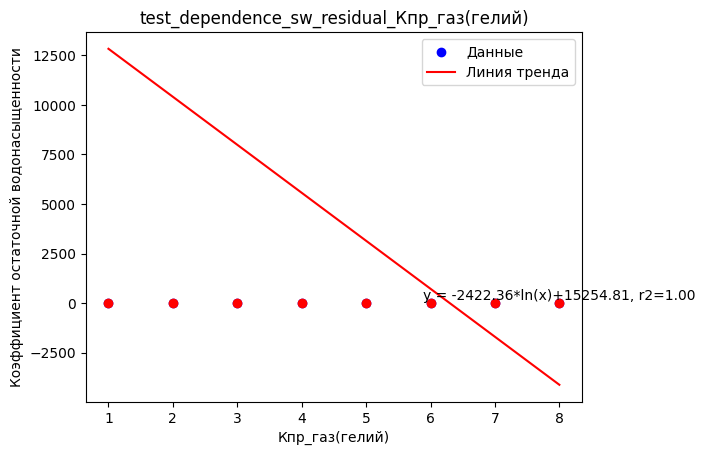

     Тест не пройден.
     Зависимость не выполняется. Выпадающие точки ([], [])
--- 0.20306921005249023 seconds ---


In [7]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 9, 8, 7, 6, 5, 4, 3])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
path="report\\"
tests = QA_QC_kern(sw_residual=x, kpr=y, file_path=path)
tests.start_tests(["test_dependence_sw_residual_kpr"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия типовой
для данного кроссплота и полученной аппроксимации.
В данном случае зависимость по функции y=b/(kв^n) при этом 1,1<n<5

Args:
    self.rn (array[int/float]): массив с данными параметр насыщенности для проверки
    self.sw_residual (array[int/float]): массив с данными коэффициент водонасыщенности для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 9, 8, 7, 6, 5, 4, 3])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8])
path="report\\"
tests = QA_QC_kern(rn=x, sw_residual=y, file_path=path)
tests.start_tests(["test_rn_sw_residual_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5, 6, 7,8, 12,7,6,5,4,3,2])
y = np.array([1, 2, 3, 4, 5, 6, 7,8, 12,91,113,10,5,4,3])
path="report\\"
tests = QA_QC_kern(rn=x, sw_residual=y, file_path=path)
tests.start_tests(["test_rn_sw_residual_dependence"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для оценки соответствия типовой
для данного кроссплота и полученной аппроксимации.
В данном случае зависимость по функции y=a/(kп^m)
при этом m>0. a>0 и a<2,5, 1,1<m<3,8

Args:
    self.rp (array[int/float]): массив с данными параметр пористости для проверки
    self.kp (array[int/float]): массив с данными Открытая пористость по жидкости для проверки

Returns:
    image: визуализация кроссплота
    dict[str, bool | datetime | str]: словарь с результатом выполнения теста, датой выполнения теста
    file: запись результата теста для сохранения состояния

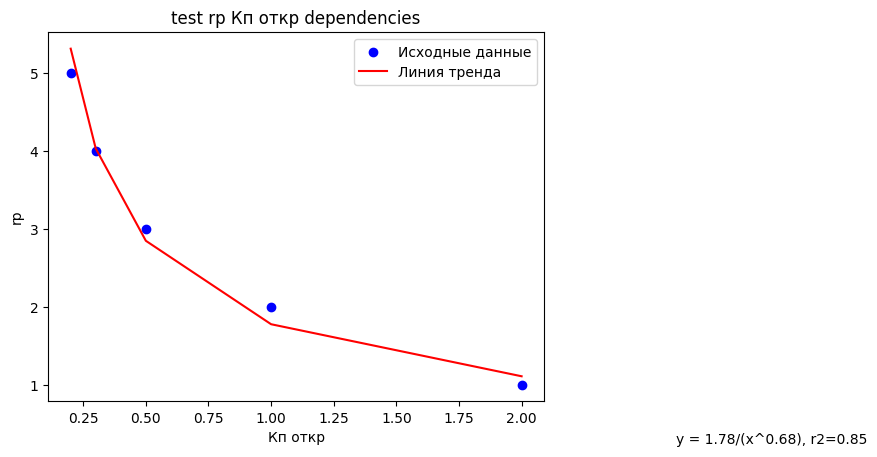

     Тест не пройден.
     Зависимость не выполняется. Выпадающие точки ([], [0, 1, 2, 3, 4])
--- 0.11209630966186523 seconds ---


In [8]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.0, 1.0, 0.5, 0.3, 0.2])
path="report\\"
tests = QA_QC_kern(rp=x, porosity_open=y, file_path=path)
tests.start_tests(["test_rp_kp_dependencies"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

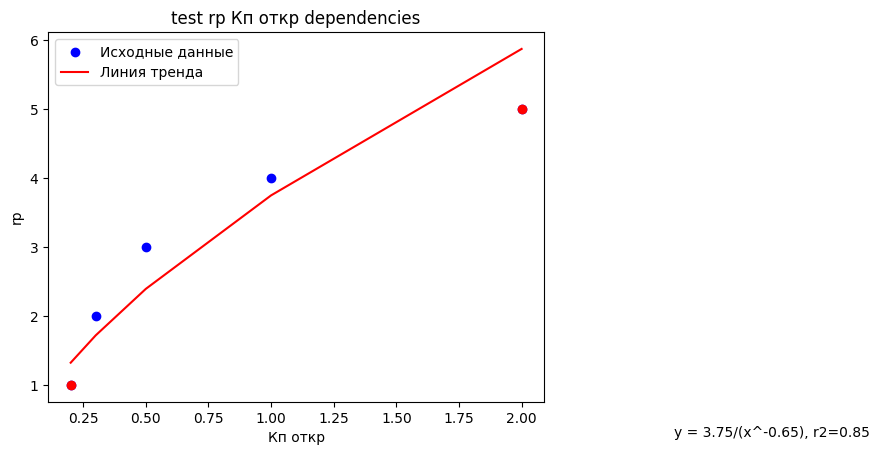

     Тест не пройден.
     Зависимость не выполняется. Выпадающие точки ([], [1, 2, 3])
--- 0.11525106430053711 seconds ---


In [9]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.3, 0.5, 1.0, 2.0])
path="report\\"
tests = QA_QC_kern(rp=x, porosity_open=y, file_path=path)
tests.start_tests(["test_rp_kp_dependencies"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест проводится для оценки отсутствия монотонности интервалов долбления. Т.е.,
подошва вышележащего интервала долбления должна быть выше или равна кровле нижележащего

Args:
    self.top (array[int/float]): массив с данными кровли для проверки
    self.bottom (array[int/float]): массив с данными подошвы для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [6]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.3, 0.5, 1.0, 2.0])
path="report\\"
tests = QA_QC_kern(top=x, bottom=y, file_path=path)
tests.start_tests(["test_coring_depths_first"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     ЗИндексы выпадающие из монотонности [0, 1, 2, 3, 4]
--- 0.0060236454010009766 seconds ---


In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
path="report\\"
tests = QA_QC_kern(top=x, bottom=y, file_path=path)
tests.start_tests(["test_coring_depths_first"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест проводится для оценкци соответствия интервала долбления: подошва-кровля ≥ выносу в метрах

Args:
    self.top (array[int/float]): массив с данными кровли для проверки
    self.bottom (array[int/float]): массив с данными подошвы для проверки
    self.core_removal_in_meters (array[int/float]): массив с данными выноса в метрах для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 11, 12, 13, 14])
y = np.array([2, 3, 4, 5, 6])
z= np.array([7, 6, 5, 4, 3])
path="report\\"
tests = QA_QC_kern(bottom=x, top=y,core_removal_in_meters=z, file_path=path)
tests.start_tests(["test_coring_depths_second"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [10]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([10, 11, 12, 13, 14])
y = np.array([2, 3, 4, 5, 6])
z= np.array([17, 16, 15, 14, 13])
path="report\\"
tests = QA_QC_kern(top=x, bottom=y,core_removal_in_meters=z, file_path=path)
tests.start_tests(["test_coring_depths_second"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Индексы выпадающих значений[0, 1, 2, 3, 4]
--- 0.006002902984619141 seconds ---


Тест оценивает соответствие значений выноса керна в метрах и в процентах

Args:
    self.intervals (array[[int/float]]): массив с массивамими,
                                        содержашими начало интервала и конец интервала
    self.percent_core_removal (array[int/float]): массив со значениями выноса в процентах
    self.outreach_in_meters(array[int/float]): массив со значениями выноса в метрах

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [11]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([[10,13], [1,11]])
y = np.array([1,10])
z=np.array([33,100])
path="report\\"
tests = QA_QC_kern(intervals=x, percent_core_removal=z, outreach_in_meters=y, file_path=path)
tests.start_tests(["test_coring_depths_third"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Индексы выпадающих значений[0]
--- 0.0055065155029296875 seconds ---


In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([[10,13], [1,11]])
y = np.array([1,10])
z=np.array([33.333,100.0])
path="report\\"
tests = QA_QC_kern(intervals=x, percent_core_removal=z, outreach_in_meters=y, file_path=path)
tests.start_tests(["test_coring_depths_third"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест проводится с целью соответствия глубин отбора образцов с глубинами выноса керна

Args:
    self.core_removal_in_meters (array[int/float]): массив с выносом керна в метрах
    self.core_sampling (array[int/float]): массив с глубинами отбора образцов
    self.bottom(array[int/float]): массив с подошвой отбора образцов

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [12]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.2, 0.3, 0.5, 1.0, 2.0])
z=np.array([0.2, 0.3, 0.5, 1.0, 2.0])
path="report\\"
tests = QA_QC_kern(core_removal_in_meters=x, core_sampling=y,bottom=z, file_path=path)
tests.start_tests(["test_coring_depths_four"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Индексы выпадающих значений[0, 1, 2, 3, 4]
--- 0.006000995635986328 seconds ---


In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 1.0, 2.0])
z=np.array([92, 39, 59, 19, 29])
path="report\\"
tests = QA_QC_kern(core_removal_in_meters=x, core_sampling=y,bottom=z, file_path=path)
tests.start_tests(["test_coring_depths_four"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест проводится с целью ранее установленных несоответствий/аномалий
при лаборатоном анализе керна, указанных в “примечаниях”

Args:
    self.table (array[int/float]): массив с данными из таблицы с
    примечанием, при наличии ошибки в массиве будет находиться 1,
    при отсутсвии 0

Returns:
    array[int]: индексы на которых находятся дефекты
    file: запись результата теста для сохранения состояния

In [13]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array(["Скол", np.nan, np.nan, np.nan, "Трещина"])
path="report\\"
tests = QA_QC_kern(note=x,file_path=path)
tests.start_tests(["test_table_notes"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Индексы выпадающих значений[0 1 2 3 4]
--- 0.004998922348022461 seconds ---


In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([np.nan, np.nan, np.nan])
path="report\\"
tests = QA_QC_kern(note=x, file_path=path)
tests.start_tests(["test_table_notes"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест выполняется с целью фиксации подлога измерений.
Подлог заключается в том, что существуют значения параметров,
схожие вплоть до 3-его знака после запятой

Args:
    self.kpr (array[int/float]): массив с данными коэффициент проницаемости для сравнения
    self.kp (array[int/float]): массив с данными Открытая пористость по жидкости для сравнения
    self.sw_residual (array[int/float]): массив с данными коэффициент остаточной водонасыщенности для сравнения
    self.rp (array[int/float]): массив с данными параметр пористости для сравнения
    self.density (array[int/float]): массив с данными всех плотностей для сравнения
    self.rn (array[int/float]): массив с данными параметр насыщенности для сравнения
    self.water_permeability (array[int/float]): массив с данными коэффициент водонасыщенности для сравнения

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [14]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,2,3])
y=np.array([1,2,3])
a=np.array([1,2,3])
b=np.array([1,2,3])
c=np.array([1,2,3])
v=np.array([1,2,3])
n=np.array([1,2,3])
path="report\\"
tests = QA_QC_kern(kpr=x, porosity_open=y,rp=a,sw_residual=b,density=c,rn=v,water_permeability=n, file_path=path)
tests.start_tests(["test_data_tampering"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест пройден успешно.
     Все данные корректны
--- 0.010028600692749023 seconds ---


In [15]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x=np.array([1,1,1])
y=np.array([4,4,4])
a=np.array([7,8,9])
b=np.array([10,11,12])
c=np.array([13,14,15])
v=np.array([16,17,18])
n=np.array([19,20,21])
path="report\\"
tests = QA_QC_kern(kpr=x, porosity_open=y,rp=a,sw_residual=b,density=c,rn=v,water_permeability=n, file_path=path)
tests.start_tests(["test_data_tampering"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест не пройден.
     Индексы выпадающих значений[[0, 1, 2], [0, 1, 2], [], [], [], [], [], [], [], [], []]
--- 0.010509729385375977 seconds ---


Тест выполянется для сравнения коэффициентов пористости, оцененных пластовых
и атмосферных условиях. Кп в атмосферных условиях всегда больше чем Кп в пластовых условиях.

Args:
    self.kp_pov (array[int/float]): массив с данными Открытая пористость по жидкости в
                                    поверхностных условиях для проверки
    self.kp_plast (array[int/float]): массив с данными Открытая пористость по жидкости
                                    в пластовых условиях для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [16]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 1.0, 2.0])
path="report\\"
tests = QA_QC_kern(poro_tbu=x, porosity_open=y, file_path=path)
tests.start_tests(["test_kp_in_surface_and_reservoir_conditions"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

TypeError: __init__() got an unexpected keyword argument 'poro_tbu'

In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([5, 6, 7, 5, 6])
y = np.array([1, 2, 3, 4, 5])
path="report\\"
tests = QA_QC_kern(poro_tbu=x, porosity_open=y, file_path=path)
tests.start_tests(["test_kp_in_surface_and_reservoir_conditions"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест оценивает величину суммарную насыщения водой и нефтью,
которая не должна привышать 100% или 1 в долях

Args:
    self.water_permeability (array[int/float]): массив с данными коэффиент водонасыщенности для проверки
    self.kno (array[int/float]): массив с данными коэффициент нефтенащенности для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [17]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([0.2, 0.1, 0.5, 0.3, 0.3])
y = np.array([0.2, 0.1, 0.2, 0.3, 0.3])
path="report\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

     Тест пройден успешно.
     Все данные корректны
--- 0.006006002426147461 seconds ---


In [ ]:
start_time = time.time()
# df=pd.read_excel(".../file.xlsx")
x = np.array([0.2, 0.1, 0.5, 0.3, 0.3])
y = np.array([0.2, 0.1, 0.5, 0.3, 0.3])
path="report\\"
tests = QA_QC_kern(sw_residual=x, kno=y, file_path=path)
tests.start_tests(["test_quo_and_qno"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 47,6]

Args:
    self.porosity_open (array[int/float]): массив с открытой пористостью в атмосферных условия для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [18]:
arr=np.array([1,2,3,4,5,6,7,50])
path="report\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.start_tests(["test_open_porosity"])
tests.generate_test_report()


     Тест не пройден.
     Данные с индексом [7] лежат не в интервале от 0 до 47,6.
------------------------------------------------------------------------------------


In [22]:
arr=np.array([1,2,3,4,5,6,7,59])
path="report\\"
tests = QA_QC_kern(porosity_open=arr,file_path=path)
tests.start_tests(["test_open_porosity"])
tests.generate_test_report()


     Тест не пройден.
     Данные с индексом [7] лежат не в интервале от 0 до 47,6.
------------------------------------------------------------------------------------


Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 47,6]

Args:
    self.poroHe (array[int/float]): массив с открытой пористостью по гелию для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [19]:
arr=np.array([1,2,0.3,0.4,0.5,6,0.7,0.50])
path="report\\"
tests = QA_QC_kern(poroHe=arr,file_path=path)
tests.start_tests(["test_porosity_HE"])
tests.generate_test_report()


     Тест не пройден.
     Данные с индексом [0, 1, 4, 5, 6, 7] лежат не в интервале от 0 до 47,6.
------------------------------------------------------------------------------------


In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="report\\"
tests = QA_QC_kern(poroHe=arr,file_path=path)
tests.start_tests(["test_porosity_HE"])
tests.generate_test_report()

Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 47,6]

Args:
    self.poro_tbu (array[int/float]): массив с открытой пористостью в пластовых условиях для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
arr=np.array([1,2,3,4,5,6,7,50])
path="report\\"
tests = QA_QC_kern(poroTBU=arr,file_path=path)
tests.start_tests(["test_porosity_TBU"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="report\\"
tests = QA_QC_kern(poroTBU=arr,file_path=path)
tests.start_tests(["test_porosity_TBU"])
tests.generate_test_report()

Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 47,6]

Args:
    self.porosity_kerosine (array[int/float]): массив с открытой пористостью по керосину для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
arr=np.array([0.1,2,3,4,5,6,7,50])
path="report\\"
tests = QA_QC_kern(porosity_kerosine=arr,file_path=path)
tests.start_tests(["test_porosity_kerosine"])
tests.generate_test_report()

In [ ]:
arr=np.array([1,2,3,4,5,6,7,13])
path="report\\"
tests = QA_QC_kern(porosity_kerosine=arr,file_path=path)
tests.start_tests(["test_porosity_kerosine"])
tests.generate_test_report()

Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 1]

Args:
    self.water_saturation (array[int/float]): массив с водонасыщенностью для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwFail(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(sw=arr,file_path=path)
tests.start_tests(["test_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwOK(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(sw=arr,file_path=path, file_name="SwOK(N).xlsx")
tests.start_tests(["test_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки физичности данных.
В данном тесте проверяется соответствие интервалу (0 ; 1]

Args:
    self.residual_water_saturation (array[int/float]): массив с остаточной водонасыщенностью для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwFail(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=arr,file_path=path)
tests.start_tests(["test_residual_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/SwOK(N).xlsx")
arr=df["Sw"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(sw_residual=arr,file_path=path, file_name="SwOK(N).xlsx")
tests.start_tests(["test_residual_water_saturation"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки физичности данных.
Значение должно быть больше 0

Args:
    self.klickenberg_permeability (array[int/float]): массив с газопроницаемостью
                                                                  с поправкой по Кликенбергу для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityKlinkenFail(R).xlsx")
arr=df["PermKlinken"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(klickenberg_permeability=arr,file_path=path)
tests.start_tests(["test_klickenberg_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityKlinkenOK(R).xlsx")
arr=df["PermKlinken"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(klickenberg_permeability=arr,file_path=path)
tests.start_tests(["test_klickenberg_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки физичности данных.
Значение должно быть больше 0

Args:
    self.parallel_permeability (array[int/float]): массив с газопроницаемостью
                                                   параллельно напластованию для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityParallelFail(L).xlsx")
arr=df["Permeabilty, mkm2"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(parallel_permeability=arr,file_path=path)
tests.start_tests(["test_parallel_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityParallelOK(L).xlsx")
arr=df["Permeabilty, mkm2"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(parallel_permeability=arr,file_path=path)
tests.start_tests(["test_parallel_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки физичности данных.
Значение должно быть больше 0

Args:
    self.effective_permeability (array[int/float]): массив с эффективной проницаемостью для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityEffOK(R).xlsx")
arr=df["PermEFF"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(effective_permeability=arr,file_path=path)
tests.start_tests(["test_effective_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityEffFail(R).xlsx")
arr=df["PermEFF"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(effective_permeability=arr,file_path=path)
tests.start_tests(["test_effective_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки физичности данных.
Значение должно быть больше 0

Args:
    self.water_permeability (array[int/float]): массив с газопроницаемостью по воде для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityWOK(R).xlsx")
arr=df["PermW"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(water_permeability=arr,file_path=path)
tests.start_tests(["test_water_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/PermeabilityWFail(R).xlsx")
arr=df["PermW"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(water_permeability=arr,file_path=path)
tests.start_tests(["test_water_permeability"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

Тест предназначен для проверки монотонности возрастания значения глубины

Args:
    self.core_sampling (array[int/float]): массив с местом отбора для проверки

Returns:
    bool: результат выполнения теста
    file: запись результата теста для сохранения состояния

In [ ]:
start_time = time.time()
df=pd.read_excel("data/MonotonousOK(F).xlsx")
arr=df["Depth, m"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(md=arr,file_path=path)
tests.start_tests(["test_monotony"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()
df=pd.read_excel("data/MonotonousFail(F).xlsx")
arr=df["Depth, m"].dropna().to_numpy()
path="report\\"
tests = QA_QC_kern(md=arr,file_path=path)
tests.start_tests(["test_monotony"])
tests.generate_test_report()
print("--- %s seconds ---" % (time.time() - start_time))